In [208]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("AmesHousing.csv")


In [209]:
# Display the first few rows of the dataset
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [210]:
#Drop these 2 columns as they are surplus to requirements and not useful
df=df.drop(columns='PID')
df=df.drop(columns='Order')

In [211]:
# Check the data types of each column and tells you how many rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [212]:
#print out the columns with missing values in descending order 
missing_values = df.isnull().sum()
highest_counts = missing_values.sort_values(ascending=False)
highest_counts[highest_counts>0]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Unf SF          1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
BsmtFin SF 1         1
Garage Area          1
BsmtFin SF 2         1
dtype: int64

There are a lot of nulls but from the data dictionary supplied here https://jse.amstat.org/v19n3/decock/DataDocumentation.txt its clear that in many cases a null value means that the property got a very bad score on the corresponding feature. For example, the scores for ‘garage_qual’ are on an  scale that includes the scores Excellent, Good, Typical, Fair, Poor, and NA when the house has no basement. By converting these features to an ordinal scale where Excellent is assigned a 5 and NA is assigned a zero, many of the null values will be addressed. Ten features are on the “Ex-Gd-TA-Fa-Po-NA” scale, so I’ll define a function to convert them all to a “5–4–3–2–1–0” scale at the same time.

In [213]:
def scale(df, column_list):
    for column in column_list:
        df[column] = df[column].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
        df[column] = pd.to_numeric(df[column])
        df[column] = df[column].fillna(0)


In [214]:
column_list = ['Bsmt Qual', 'Bsmt Cond', 'Exter Qual', 'Exter Cond', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Kitchen Qual', 'Heating QC']
scale(df, column_list)


In [215]:
missing_values = df.isnull().sum()
highest_counts = missing_values.sort_values(ascending=False)
highest_counts[highest_counts>0]

Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Lot Frontage       490
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

The following columns were on different type of ordinal scales, for example, Paved Drive having fully, partly or none so convert these to numerical similarily to above and also remove all nulls

In [216]:
df["Lot Shape"] = df["Lot Shape"].map({"Reg":3,"IR1":2, "IR2":1, "IR2":0}).fillna(0)
df["Utilities"] = df["Utilities"].map({"AllPub":3,"NoSewr":2, "NoSeWa":1, "ELO":0}).fillna(0)
df["Land Slope"] = df["Land Slope"].map({"Gtl":2,"Mod":1, "Sev":0}).fillna(0)
df["Bsmt Exposure"] = df["Bsmt Exposure"].map({"Gd":4, "Av":3,"Mn":2, "No":1, "NA":0}).fillna(0)
df["BsmtFin Type 1"] = df["BsmtFin Type 1"].map({"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3,"LwQ":2, "Unf":1, "NA":0}).fillna(0)
df["BsmtFin Type 2"] = df["BsmtFin Type 2"].map({"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3,"LwQ":2, "Unf":1, "NA":0}).fillna(0)
df["Electrical"] = df["Electrical"].map({"SBrkr":4, "FuseA":3,"FuseF":2, "FuseP":1, "Mix":0}).fillna(0)
df["Functional"] = df["Functional"].map({"Typ":7, "Min1":6, "Min2":5, "Mod":4, "Maj1":3,"Maj2":2, "Sev":1, "Sal":0}).fillna(0)
df["Paved Drive"] = df["Paved Drive"].map({"N":0, "P":1, "Y":2}).fillna(0)
df["Garage Finish"] = df["Garage Finish"].map({"Fin":3,"Rfn":2, "Unf":1}).fillna(0)
df["Fence"] = df["Fence"].map({"GdPrv":4, "MnPrv":3,"GdWo":2, "MnWw":1, "NA":0}).fillna(0)
#df["Misc Feature"] = df["Misc Feature"].map({"Elev":5, "Gar2":4, "Othr":3,"Shed":2, "TenC":1, "NA":0}).fillna(0)
df["Alley"] = df["Alley"].map({"Grvl":2,"Pave":1, "NA":0}).fillna(0)
#df["Mas Vnr Type"] = df["Mas Vnr Type"].map({"Stone":4, "BrkFace":3,"BrkCmn":2, "CBlock":1, "None":0}).fillna(0)
#df["Garage Type"] = df["Garage Type"].map({"Attchd":6, "BuitIn":5, "Basment":4, "Detchd":3,"2Types":2, "CarPort":1, "NA":0}).fillna(0)

In [217]:
df["Lot Frontage"]=df["Lot Frontage"].fillna(0)
df["Garage Yr Blt"]=df["Garage Yr Blt"].fillna(0)
df["Mas Vnr Area"]=df["Mas Vnr Area"].fillna(0)

In [218]:
missing_values = df.isnull().sum()
highest_counts = missing_values.sort_values(ascending=False)
highest_counts[highest_counts>0]

Misc Feature      2824
Mas Vnr Type      1775
Garage Type        157
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
BsmtFin SF 1         1
dtype: int64

In [219]:
#df = df.dropna()
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,0.0,2.0,Lvl,3,Corner,...,0,0.0,0.0,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,0.0,3.0,Lvl,3,Inside,...,0,0.0,3.0,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,0.0,2.0,Lvl,3,Corner,...,0,0.0,0.0,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,0.0,3.0,Lvl,3,Corner,...,0,0.0,0.0,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,0.0,2.0,Lvl,3,Inside,...,0,0.0,3.0,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,0.0,2.0,Lvl,3,CulDSac,...,0,0.0,4.0,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,0.0,8885,Pave,0.0,2.0,Low,3,Inside,...,0,0.0,3.0,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,0.0,3.0,Lvl,3,Inside,...,0,0.0,3.0,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,0.0,3.0,Lvl,3,Inside,...,0,0.0,0.0,NaN,0,4,2006,WD,Normal,170000


In [188]:
#Add all the baths together in the house and put into one column then delete the rest. We only care how many baths there are
bath_columns = [col for col in df.columns if 'Bath' in col]

# Check if any columns contain the word 'bath'
if not bath_columns:
    print("No columns containing the word 'bath' found.")
else:
    # Summing up the bath columns
    total_baths = df[bath_columns].sum(axis=1)

    # Storing the total in a variable called 'Total Baths'
    df['Total Baths'] = total_baths

    # Drop the original bath columns
    df.drop(columns=bath_columns, inplace=True)

    # Display the DataFrame to verify changes
    print(df.head())

     MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Alley  Lot Shape  \
2             20        RL          81.0     14267   Pave    0.0        2.0   
23            20        RL           0.0     11241   Pave    0.0        2.0   
114           60        RL          80.0     10421   Pave    0.0        3.0   
134           85        RL          75.0     11380   Pave    0.0        2.0   
139           20        RL          70.0      8197   Pave    0.0        3.0   

    Land Contour  Utilities Lot Config  ...  Pool QC Fence Misc Feature  \
2            Lvl          3     Corner  ...      0.0   0.0         Gar2   
23           Lvl          3    CulDSac  ...      0.0   0.0         Shed   
114          Lvl          3     Inside  ...      0.0   3.0         Shed   
134          Lvl          3     Inside  ...      0.0   0.0         Shed   
139          Lvl          3     Inside  ...      0.0   3.0         Shed   

    Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  \
2   

In [191]:
# Converting 'Year Remod/Add' to numerical 'Is Remodeled'

df['Is Remodeled'] = np.where(df['Year Remod/Add'] - df['Year Built'] > 0, 1, 0)
df.drop(['Year Remod/Add'], axis=1, inplace=True)

In [206]:
df.to_csv('df.csv', index=False)

In [190]:
# Store the column 'SalePrice' in 'label'
label = df[['SalePrice']]

# Display first 5 records
label.head()

,SalePrice
2,172000
23,149000
114,196500
134,178000
139,214000


In [40]:
df_new = df.drop(['SalePrice', 'PID'], axis = 1)

In [41]:
df_new.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


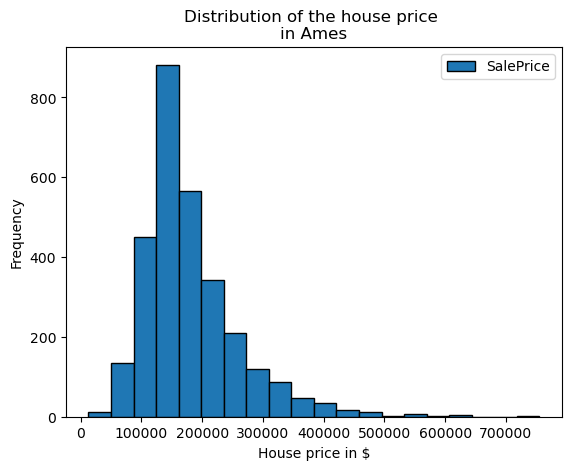

In [91]:
# use matplotlib function plot.hist to create the bar chart
label.plot.hist(bins=20, edgecolor="black")
plt.xlabel("House price in $")
_ = plt.title("Distribution of the house price \nin Ames")

We can see here that most houses are in the 100 to 300K range but we would need to figure out what it is about the outliers at 600 and 700K which makes them so much more valuable

From looking at df.info above we can see that there are 2 types of data, numerical (int, float) and categorical (object). We will look first at the numerical values

In [162]:
numerical = df.select_dtypes("number")
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   Lot Frontage     2927 non-null   float64
 2   Lot Area         2927 non-null   int64  
 3   Alley            2927 non-null   float64
 4   Lot Shape        2927 non-null   float64
 5   Utilities        2927 non-null   int64  
 6   Land Slope       2927 non-null   int64  
 7   Overall Qual     2927 non-null   int64  
 8   Overall Cond     2927 non-null   int64  
 9   Year Built       2927 non-null   int64  
 10  Year Remod/Add   2927 non-null   int64  
 11  Mas Vnr Type     2927 non-null   float64
 12  Mas Vnr Area     2927 non-null   float64
 13  Exter Qual       2927 non-null   int64  
 14  Exter Cond       2927 non-null   int64  
 15  Bsmt Qual        2927 non-null   float64
 16  Bsmt Cond        2927 non-null   float64
 17  Bsmt Exposure    29

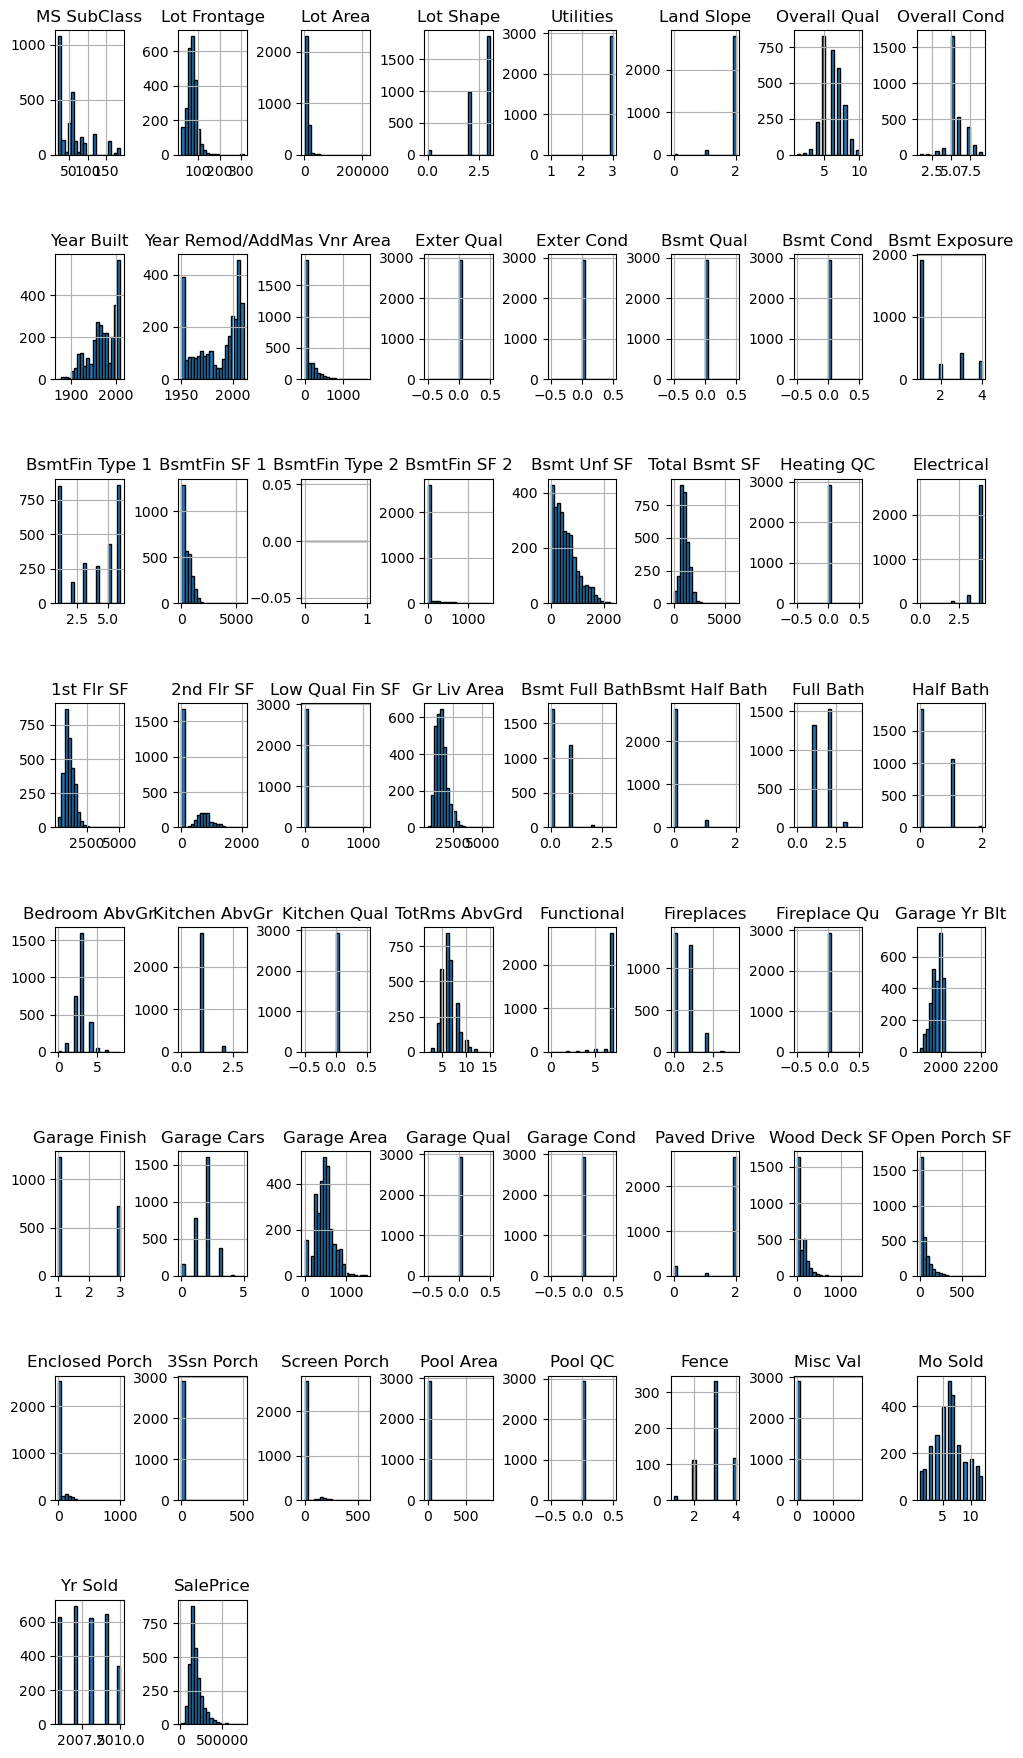

In [31]:
numerical.hist(
    bins=20, figsize=(12, 22), edgecolor="black"
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)

In [163]:
# Now examine the strings
string = df.select_dtypes(object)
string.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2927 non-null   object
 1   Street          2927 non-null   object
 2   Land Contour    2927 non-null   object
 3   Lot Config      2927 non-null   object
 4   Neighborhood    2927 non-null   object
 5   Condition 1     2927 non-null   object
 6   Condition 2     2927 non-null   object
 7   Bldg Type       2927 non-null   object
 8   House Style     2927 non-null   object
 9   Roof Style      2927 non-null   object
 10  Roof Matl       2927 non-null   object
 11  Exterior 1st    2927 non-null   object
 12  Exterior 2nd    2927 non-null   object
 13  Foundation      2927 non-null   object
 14  Heating         2927 non-null   object
 15  Central Air     2927 non-null   object
 16  Sale Type       2927 non-null   object
 17  Sale Condition  2927 non-null   object
dtypes: object(18)

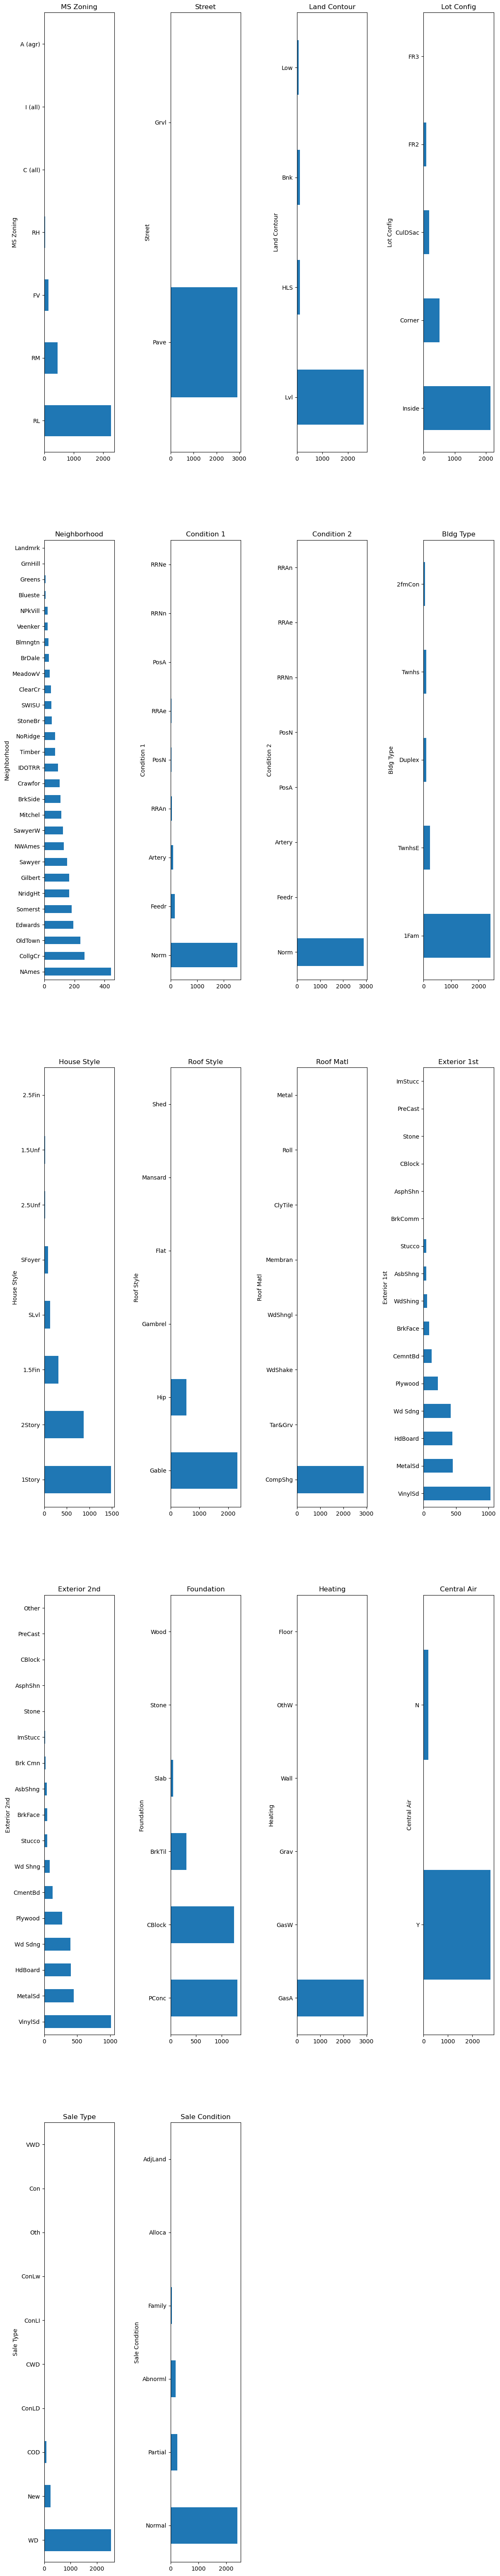

In [164]:
from math import ceil
from itertools import zip_longest

n_string_features = string.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(string, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    string[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

In [222]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


numerical_features = [
    "Lot Frontage",
    "LotArea",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    'Sale Price',
]
categorical_features = df.columns.difference(numerical_features)

most_frequent_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

preprocessor = make_column_transformer(
    (most_frequent_imputer, categorical_features),
    (mean_imputer, numerical_features),
)
ames_housing_preprocessed = pd.DataFrame(
    preprocessor.fit_transform(df),
    columns=categorical_features.tolist() + numerical_features,
)
ames_housing_preprocessed = ames_housing_preprocessed[df.columns]
ames_housing_preprocessed = ames_housing_preprocessed.astype(
    df.dtypes
)
(ames_housing_no_missing == ames_housing_preprocessed).all()

ValueError: A given column is not a column of the dataframe